In [20]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

plt.style.use('ggplot')

import nltk
from nltk.tokenize import word_tokenize
import re

# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
dataset = load_dataset("amazon_us_reviews","Camera_v1_00")
df = pd.DataFrame(dataset['train']).head(500)

df

Found cached dataset amazon_us_reviews (C:/Users/Splute/.cache/huggingface/datasets/amazon_us_reviews/Camera_v1_00/0.1.0/17b2481be59723469538adeb8fd0a68b0ba363bbbdd71090e72c325ee6c7e563)


  0%|          | 0/1 [00:00<?, ?it/s]

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,US,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,US,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,US,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,US,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


In [3]:
# 添加一个新的整数索引，并将其保存为'id'列
df['id'] = df.reset_index(drop=True).index
# 将'id'列移动到最左边
id_column = df['id']  # 获取'id'列
df.drop(columns=['id'], inplace=True)  # 删除'id'列
df.insert(0, 'id', id_column)  # 将'id'列插入到第一列

df

,id,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,US,3817265,R99R8WCERJULL,B00NW31YSE,705677192,Canary All-in-One Home Security Device,Camera,4,3,3,0,1,Should have some more views and 2-3 days to ch...,Should have some more views and 2-3 days to ch...,2015-08-31
496,496,US,45595220,R1P4L1QXJLXHQW,B00F5JV4NS,129493899,FotoTech ML-L3 Wireless Shutter Release Remote...,Camera,5,0,0,0,1,Five Stars,Works as described.,2015-08-31
497,497,US,121175,R20XEM5K76M9YR,B00YIXG9EG,11160417,KingCool WiFi 12MP Full HD 1080P DVR Camcorder...,Camera,5,0,1,0,1,Five Stars,Great little camera. Comes in handy when hooki...,2015-08-31
498,498,US,46244743,R39VQ7G7W7E7KA,B003LZ5SM6,761331780,Opteka LP-E8 2000mAh Ultra High Capacity Li-io...,Camera,3,0,0,0,1,Three Stars,It's good enough to give the original battery ...,2015-08-31


## 1. VADER

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm ## to add progress bars to loops and iterations

sia = SentimentIntensityAnalyzer()

In [5]:
# run on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [6]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df, how='left')
vaders.head()

,id,neg,neu,pos,compound,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.000,0.000,1.000,0.2960,US,2975964,R1NBG94582SJE2,B00I01JQJM,860486164,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.000,0.389,0.611,0.7424,US,23526356,R273DCA6Y0H9V7,B00TCO0ZAA,292641483,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.027,0.908,0.065,0.8501,US,52764145,RQVOXO7WUOFK6,B00B7733E0,75825744,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.053,0.798,0.149,0.8033,US,47348933,R1KWKSF21PO6HO,B006ZN4U34,789352955,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.025,0.739,0.237,0.9298,US,33680700,R38H3UO1J190GI,B00HUEBGMU,19067902,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


## 2. LSTM

In [33]:
from keras.models import load_model
clf_lstm = load_model('models/biLSTM_tweet.h5')

In [34]:
texts = df['review_body'].tolist()

In [38]:
def clean_text(data):
    # 去除URL链接
    data = re.sub(r'http\S+', '', data)
    
    # 去除@提及的用户名
    data = re.sub(r'@\w+', '', data)
    
    # 去除#标签
    data = re.sub(r'#\w+', '', data)
    
    # 去除RT（转发）标识
    data = re.sub(r'RT\s+', '', data)
    
    # 去除多余的空格和换行符
    data = re.sub(r'\s+', ' ', data).strip()
    
    # tekenization using nltk / 分词
    data = word_tokenize(data)
    
    return data

In [39]:
texts = [' '.join(clean_text(text)) for text in texts]

In [40]:
# Tokenization + fitting using keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

In [41]:
def polarity_scores_lstm(example, tokenizer):
    cleaned_exa = clean_text(example)
    seq = tokenizer.texts_to_sequences(cleaned_exa)
    padded = pad_sequences(seq, maxlen=500)
    scores = clf_lstm.predict(padded)
    scores_dict = {
        'biLSTM_neg': scores[0][0],
        'biLSTM_neu': scores[0][1],
        'biLSTM_pos': scores[0][2]
    }

    return scores_dict

In [44]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_body']
    myid = row['id']
    vader_result = sia.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
        vader_result_rename[f"vader_{key}"] = value
    biLSTM_result = polarity_scores_lstm(example = text, tokenizer = tokenizer)
    both = {**vader_result_rename, **biLSTM_result}

    res[myid] = both



  0%|          | 0/500 [00:00<?, ?it/s]

In [45]:
result_df = pd.DataFrame(res).T
result_df = result_df.reset_index().rename(columns={'index':'id'})
result_df = result_df.merge(df, how='left')
result_df.head()

,id,vader_neg,vader_neu,vader_pos,vader_compound,biLSTM_neg,biLSTM_neu,biLSTM_pos,marketplace,customer_id,...,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,0.000,0.000,1.000,0.2960,0.212135,0.363094,0.424770,US,2975964,...,GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...,Camera,5,0,0,0,1,Five Stars,ok,2015-08-31
1,1,0.000,0.389,0.611,0.7424,0.215961,0.360435,0.423604,US,23526356,...,Professional 58mm Center Pinch Lens Cap for CA...,Camera,5,0,0,0,1,Love it!!!,"Perfect, even sturdier than the original!",2015-08-31
2,2,0.027,0.908,0.065,0.8501,0.103040,0.552293,0.344667,US,52764145,...,Spy Tec Z12 Motion Activated Intelligent Secur...,Camera,2,1,1,0,1,Another Motion Detect Fail,"If the words, &#34;Cheap Chinese Junk&#34; com...",2015-08-31
3,3,0.053,0.798,0.149,0.8033,0.168093,0.538959,0.292948,US,47348933,...,"Celestron UpClose G2 10x25 Monocular, Black (7...",Camera,5,0,0,0,1,Exactly what I wanted and expected.,Exactly what I wanted and expected. Perfect fo...,2015-08-31
4,4,0.025,0.739,0.237,0.9298,0.235096,0.514151,0.250754,US,33680700,...,Vidpro XM-L Wired Lavalier microphone - 20' Au...,Camera,5,1,1,0,1,Good mic at a Good Price...Not Canon Though.,I will look past the fact that they tricked me...,2015-08-31


## Compared these two models

In [46]:

result_df.columns

Index(['id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'biLSTM_neg', 'biLSTM_neu', 'biLSTM_pos', 'marketplace', 'customer_id',
       'review_id', 'product_id', 'product_parent', 'product_title',
       'product_category', 'star_rating', 'helpful_votes', 'total_votes',
       'vine', 'verified_purchase', 'review_headline', 'review_body',
       'review_date'],
      dtype='object')

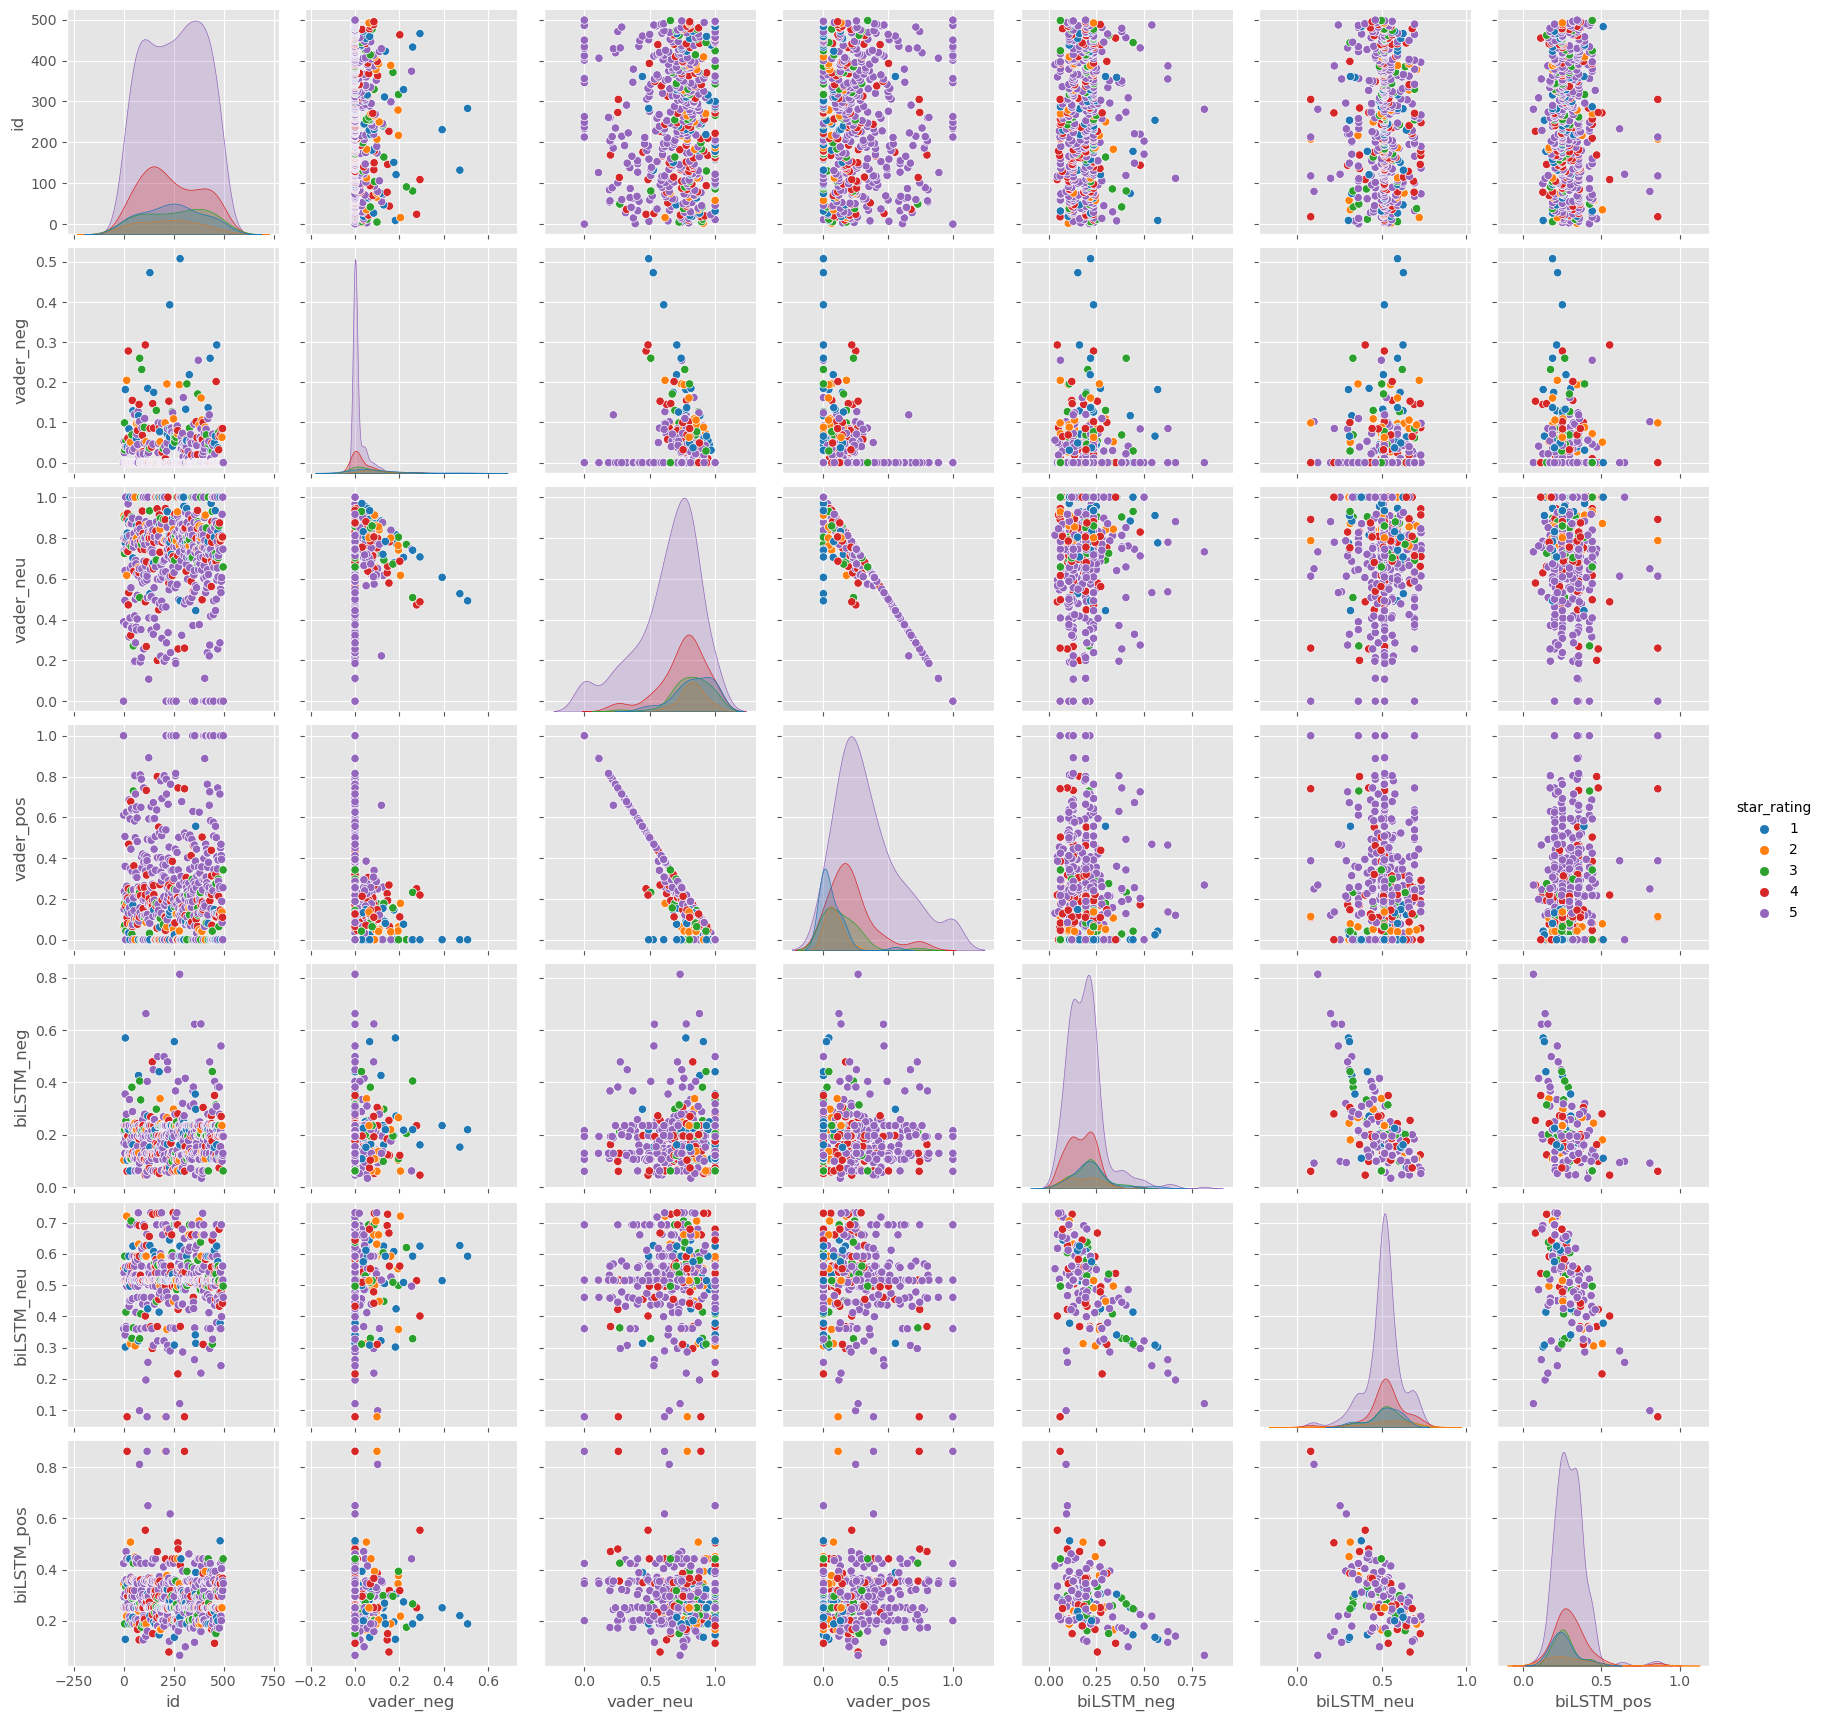

In [48]:
sns.pairplot(data = result_df, 
            vars=['id', 'vader_neg', 'vader_neu', 'vader_pos',
                    'biLSTM_neg', 'biLSTM_neu', 'biLSTM_pos'],
            hue = 'star_rating',
            palette = 'tab10')

plt.show()